In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
heartDiseaseDF = pd.read_csv("Resources/Heart_Disease.csv")
heartDiseaseDF = heartDiseaseDF.rename(columns={'LocationAbbr':'State'})
heartDiseaseDF.head(2)

,Year,State,Poverty,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Gender,Race/Ethnicity,LocationID,Location 1
0,2014,AK,10.5,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,105.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,2013,"(55.440626, -161.962562)"
1,2014,AK,10.5,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,211.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,2016,"(52.995403, -170.251538)"


In [3]:
heartDiseaseDF = heartDiseaseDF.dropna()
heartDiseaseDF.count()

Year               57456
State              57456
Poverty            57456
LocationDesc       57456
GeographicLevel    57456
DataSource         57456
Class              57456
Topic              57456
Data_Value         57456
Data_Value_Unit    57456
Data_Value_Type    57456
Gender             57456
Race/Ethnicity     57456
LocationID         57456
Location 1         57456
dtype: int64

In [4]:
#Analysis: Heart Disease against State
#To perform this analysis, heartDiseaseDF can be reduced to contain just 2 columns - Data_Value and State
stateDF = heartDiseaseDF[['Data_Value', 'State']]
#Retreive all the States
#Sorting is very important as the unique() method creates an unsorted list.
states = sorted(stateDF['State'].unique())
print(f"US States:\n {states}")


US States:
 ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


Average of every State / 100,000 population suffering from HD grouped by Gender: State
AK    126.979563
AL    252.744036
AR    232.464254
AZ    249.267708
CA    282.351130
Name: Data_Value, dtype: float64


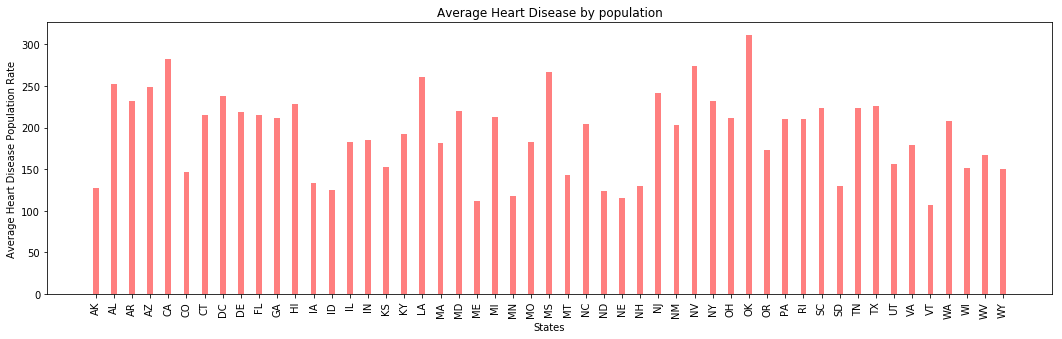

Total of every State / 100,000 population suffering from HD grouped by Gender: State
AK     63997.7
AL    309358.7
AR    318011.1
AZ     71789.1
CA    299856.9
Name: Data_Value, dtype: float64


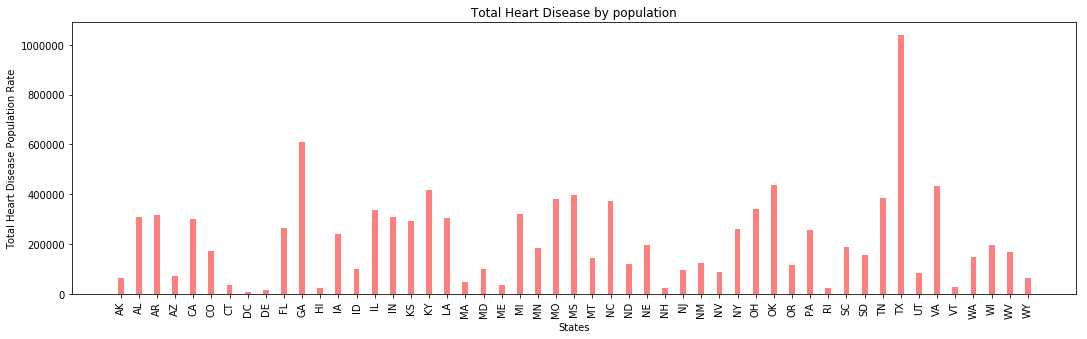

In [5]:
def stateStatHD(stat='mean'):
    '''
        We want to find out total and mean of every state against 100,000 population suffering from HD.
        Perform a GROUP BY to group all the States.
    '''
    stateGrouped = stateDF.groupby(by='State')
    #stateGrouped = heartDiseaseDF.groupby(by='State')
    if stat == 'mean':
        totalHDByState = stateGrouped['Data_Value'].mean()
        print(f"Average of every State / 100,000 population suffering from HD grouped by Gender: {totalHDByState.head()}")
    else:
        totalHDByState = stateGrouped['Data_Value'].sum()
        print(f"Total of every State / 100,000 population suffering from HD grouped by Gender: {totalHDByState.head()}")
    
    #Construct a Bar chart to indicate the HD% suffered by total of every state
    x_axis = np.arange(len(states)) * 2.5
    y_axis = list(round(totalHDByState, 2))
    tick_locations = [value+0.4 for value in x_axis]

    plt.figure(figsize=(18,5))
    plt.bar(x_axis, y_axis, color='r', alpha=0.5, align='edge')
    plt.xticks(tick_locations, states, rotation="vertical")
    plt.xlabel('States')
    if stat=='mean':
        plt.ylabel('Average Heart Disease Population Rate')
        plt.title("Average Heart Disease by population")
        plt.savefig('Images/AverageHDPopulation.png')
    else:
        plt.ylabel('Total Heart Disease Population Rate')
        plt.title("Total Heart Disease by population")
        plt.savefig('Images/TotalHDPopulation.png')
    plt.show()
    
stateStatHD('mean')
stateStatHD('sum')

In [6]:
#Analysis: Hear Disease against County
#To perform this analysis, heartDiseaseDF can be reduced to contain just 2 columns - Data_Value and County
geographyDF = heartDiseaseDF[['Data_Value', 'GeographicLevel']]

#Retreive all the States
geoLevels = sorted(geographyDF['GeographicLevel'].unique())
print(f"US Geographic Levels:\n {geoLevels}")

US Geographic Levels:
 ['County', 'State']


In [7]:
#We want to find out the total of every level per 1000,000 population suffered from HD.
#Perform a GROUP BY to group all the Genders.

geoLevelDFGrouped = geographyDF.groupby(by='GeographicLevel')
totalHDByGeoLevel = geoLevelDFGrouped['Data_Value'].mean()
print(f"Total number of people out of 1000,000 population suffering from HD grouped by Gender: {totalHDByGeoLevel}")

Total number of people out of 1000,000 population suffering from HD grouped by Gender: GeographicLevel
County    193.379170
State     251.180719
Name: Data_Value, dtype: float64


In [8]:
#Analysis: Heart Disease against Gender.
#To perform this analysis, heartDiseaseDF can be reduced to contain just 2 columns - Data_Value and Gender.

#Create a Gender Data Frame.
genderDF = heartDiseaseDF[['Data_Value', 'Gender']]
genderDF.head()

,Data_Value,Gender
0,105.3,Overall
1,211.9,Overall
2,257.9,Overall
3,351.6,Overall
4,0.0,Overall


In [9]:
#Investigate the Types of Genders
genderTypes = sorted(genderDF['Gender'].unique())
genderTypes

['Female', 'Male', 'Overall']

In [10]:
#We want to find out the total of every gender per 1000,000 population suffered from HD.
#Perform a GROUP BY to group all the Genders.

genderDFGrouped = genderDF.groupby(by='Gender')
totalHDByGenderType = genderDFGrouped['Data_Value'].sum()
print(f"Total number of people out of 1000,000 population suffering from HD grouped by Gender: {totalHDByGenderType}")

Total number of people out of 1000,000 population suffering from HD grouped by Gender: Gender
Female     2792090.7
Male       4505249.7
Overall    3866515.0
Name: Data_Value, dtype: float64


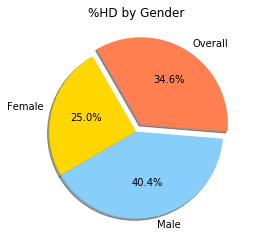

In [11]:
#Construct a Pie Chart to indicate the HD % suffered by every Gender 

pieColors = ['Gold', 'LightSkyBlue', 'Coral']
explodeTuple = [0,0,0.1]

#Build the Pie Chart
plt.pie(x=totalHDByGenderType, explode=explodeTuple, colors=pieColors, labels=genderTypes, 
        shadow=True, autopct="%1.1f%%", startangle = 120)
plt.title("%HD by Gender")

plt.savefig("Images/HDGender.png")

plt.show()